In [1]:
import gurobipy as gp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('stocks2019.csv', index_col='X')
df.sample(5)

,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
X,,,,,,,,,,,,,,,,,,,,,
2019-10-25,8029.220215,54.898937,270.980011,32.709999,105.180000,243.380005,1264.300049,1265.130005,1761.329956,197.617661,...,30.820000,240.899994,190.160004,147.935242,194.490005,53.309410,160.750000,59.962185,62.019302,93.371750
2019-01-18,6784.609863,47.946972,247.509995,20.770000,117.050003,220.089996,1107.300049,1098.260010,1696.199951,193.848892,...,32.400002,291.500000,164.440002,114.330719,194.699997,68.044983,172.080002,37.204628,48.409843,91.097481
2019-08-23,7464.990234,47.020756,282.440002,29.540001,115.330002,175.039993,1153.579956,1151.290039,1749.619995,193.753860,...,32.139999,322.100006,200.520004,153.340073,180.179993,47.441723,192.130005,53.028072,60.469913,99.344002
2019-07-15,7966.930176,47.348595,308.760010,34.389999,123.040001,284.299988,1150.510010,1150.339966,2020.989990,170.202286,...,37.349998,355.679993,221.039993,150.999451,176.369995,53.273735,218.000000,53.037773,59.240185,119.286942
2019-06-18,7635.399902,45.470947,276.779999,30.450001,122.370003,290.059998,1105.239990,1103.599976,1901.369995,175.507843,...,35.990002,347.209991,205.929993,143.323029,177.940002,50.328384,213.240005,36.573074,58.175064,109.599655


In [3]:
returns = df / df.shift(1)
returns = returns - 1
returns = returns[1:]
returns.sample(5)

,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
X,,,,,,,,,,,,,,,,,,,,,
2019-07-18,0.001948,-0.020566,0.002230,-0.017857,-0.001215,-0.001902,0.000436,-0.000017,-0.007093,0.014007,...,0.010904,-0.000491,-0.009956,0.009704,0.005363,0.005502,-0.000596,0.026995,0.010607,0.016128
2019-01-03,-0.033602,-0.035509,-0.039498,-0.094530,0.022030,-0.085791,-0.027696,-0.028484,-0.025242,-0.015216,...,-0.022834,-0.018591,-0.034989,-0.030557,-0.002133,-0.010435,-0.035808,-0.068217,-0.003940,-0.037651
2019-07-24,0.007046,0.020470,0.007763,0.018513,-0.011844,0.008060,-0.007247,-0.007328,0.003169,-0.001364,...,-0.011776,0.002699,0.005099,-0.000265,-0.010842,0.010064,0.012360,0.024652,0.000828,0.038184
2019-06-26,0.004678,0.011472,0.002604,0.036729,0.001518,-0.028766,-0.006675,-0.006029,0.010414,-0.006886,...,0.051143,-0.011099,-0.010630,-0.011640,-0.013822,-0.010765,0.000293,0.072993,-0.025250,0.038927
2019-08-21,0.008970,0.004918,0.020370,0.031901,0.030602,0.010831,0.006802,0.007238,0.012302,0.003790,...,-0.015882,0.015600,0.005752,0.002971,0.014587,0.004539,0.025625,0.002847,0.009616,0.009420


In [4]:
correlation = returns.iloc[:,1:].corr()
correlation

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,ADI,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
ATVI,1.000000,0.399939,0.365376,0.223162,0.216280,0.433097,0.426777,0.467076,0.203956,0.329355,...,0.322906,0.128241,0.464850,0.316549,0.259679,0.218149,0.311659,0.303077,0.043389,0.249667
ADBE,0.399939,1.000000,0.452848,0.368928,0.363370,0.552125,0.540404,0.598237,0.291978,0.473815,...,0.360392,0.201151,0.711339,0.541243,0.402171,0.228106,0.650430,0.361516,0.207403,0.289497
AMD,0.365376,0.452848,1.000000,0.301831,0.344252,0.418861,0.417254,0.549302,0.151452,0.503733,...,0.332776,0.210623,0.498342,0.330900,0.272983,0.281950,0.407626,0.438892,0.017283,0.478010
ALXN,0.223162,0.368928,0.301831,1.000000,0.332433,0.315993,0.307698,0.363170,0.342022,0.317040,...,0.257143,0.408936,0.350581,0.191489,0.522423,0.192720,0.416396,0.289908,0.047947,0.200356
ALGN,0.216280,0.363370,0.344252,0.332433,1.000000,0.248747,0.250316,0.399281,0.264599,0.328280,...,0.175957,0.128559,0.360886,0.251855,0.334978,0.219595,0.308968,0.284407,0.088059,0.253934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBA,0.218149,0.228106,0.281950,0.192720,0.219595,0.232900,0.230603,0.288168,0.194490,0.347861,...,0.257049,0.145330,0.195475,0.126118,0.214585,1.000000,0.211641,0.296309,-0.130798,0.276643
WDAY,0.311659,0.650430,0.407626,0.416396,0.308968,0.379493,0.371826,0.424748,0.211712,0.351734,...,0.235045,0.269545,0.569672,0.401476,0.376047,0.211641,1.000000,0.315699,0.209240,0.254117
WDC,0.303077,0.361516,0.438892,0.289908,0.284407,0.328619,0.322110,0.419620,0.172623,0.602935,...,0.377215,0.126463,0.331916,0.308558,0.314773,0.296309,0.315699,1.000000,-0.076115,0.516958
XEL,0.043389,0.207403,0.017283,0.047947,0.088059,0.059930,0.052570,0.076724,0.137857,-0.047259,...,-0.172752,0.074686,0.280371,0.407770,0.191667,-0.130798,0.209240,-0.076115,1.000000,-0.117552


# Question 2

## Stock selection

In [5]:
n = len(correlation)
m = 5
dec_var = n + n*n

In [6]:
obj = np.array([0] * n + np.array(correlation).flatten().tolist())

# We are initializing the constraint matrix
eq = 1 + n + n*n
var = dec_var
A = np.zeros((eq, var))                    
b = np.zeros(eq)
sense = np.array(['<'] * eq )
vtype = ['B'] * dec_var

# total number of stocks to choose = m 
A[0,:n] = 1
b[0] = m

# each stock can represented by only one stock
for i in range(n):
    A[1 + i, n + i*n : n + i*n + n] = 1

# ith stock can be represented by jth iff jth stock is part of portfolio
for i in range(n):
    for j in range(n):
        A[1 + n + i*n + j, n + n*i + j] = 1
        A[1 + n + i*n + j, j] = -1


b[1:n] = 1
sense[:n] = '='

In [9]:
opModel = gp.Model()

opModX = opModel.addMVar(len(obj), vtype=vtype)

opModCon = opModel.addMConstrs(A, opModX, sense, b)
opModel.setMObjective(None, obj, 0, sense=gp.GRB.MAXIMIZE)

opModel.Params.OutputFlag = 0
opModel.optimize()  

print(opModel.objVal)
print(opModX.x)

54.199120202352304
[-0. -0.  0. ...  0.  0.  0.]


In [10]:
print("Stocks chosen:")
stocks_chosen = []
for i in range(n):
    if opModX.x[i] == 1:
        print(correlation.index[i])
        stocks_chosen = stocks_chosen + [i]

Stocks chosen:
LBTYK
MXIM
MSFT
VRTX
XEL


## Portofolio Weights 

In [11]:
obj = np.array([0] * m + [1] * len(returns))

# We are initializing the constraint matrix
eq = 1 + (len(returns) * 2)
var = m + len(returns)
A = np.zeros((eq, var))                     
b = np.zeros(eq)
sense = np.array(['<'] * eq )

# sum of weights = 1
A[0,:m] = 1
b[0] = 1
sense[0] = '='

# constraint for minimizing the absolute difference between index and portfolio
for i in range(len(returns)):
    for j in range(m):
        A[2*i + 1, j] = returns.iloc[i, stocks_chosen[j]+1]
        A[2*i + 2, j] = returns.iloc[i, stocks_chosen[j]+1]
    A[2*i + 1, 5 + i] = 1
    A[2*i + 2, 5 + i] = -1
    b[2*i + 1] = returns['NDX'].iloc[i]
    b[2*i + 2] = returns['NDX'].iloc[i]
    sense[2*i + 1] = '>'
    sense[2*i + 2] = '<'

In [12]:
opModel = gp.Model()

opModX = opModel.addMVar(len(obj))

opModCon = opModel.addMConstrs(A, opModX, sense, b)
opModel.setMObjective(None, obj, 0, sense=gp.GRB.MINIMIZE)

opModel.Params.OutputFlag = 0
opModel.optimize()  

print(opModel.objVal)
print("Weights")
print(opModX.x[:m])

weights = opModX.x[:m]

0.7891782824631473
Weights
[0.04886175 0.21038806 0.58035198 0.07119022 0.089208  ]


In [13]:
returns['portfolio'] = 0

for i in range(m):
    returns['portfolio'] = returns['portfolio'] + weights[i] * returns.iloc[:, stocks_chosen[i]+1]

In [14]:
returns['portfolio_performance'] = returns['NDX'] - returns['portfolio']
returns['portfolio_performance'] = returns['portfolio_performance'].abs()
print("Performance on 2019 stocks - ", returns['portfolio_performance'].sum())

Performance on 2019 stocks -  0.7891782824631476


In [15]:
df_20 = pd.read_csv('stocks2020.csv', index_col=0)


returns_20 = df_20 / df_20.shift(1)
returns_20 = returns_20[1:]

In [16]:
returns_20['portfolio'] = 0

for i in range(m):
    returns_20['portfolio'] = returns_20['portfolio'] + weights[i] * returns_20.iloc[:, stocks_chosen[i]+1]

returns_20['portfolio_performance'] = returns_20['NDX'] - returns_20['portfolio']
returns_20['portfolio_performance'] = returns_20['portfolio_performance'].abs()
print("Performance on 2020 stocks - ", returns_20['portfolio_performance'].sum())

Performance on 2020 stocks -  1.1124373455076475


# Task 3

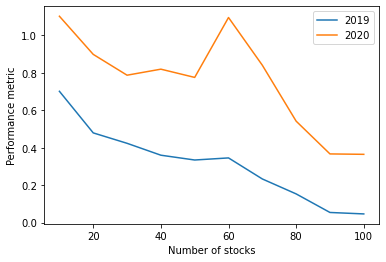

In [17]:
n = len(correlation)
dec_var = n + n*n
max_m = 100
min_m = 10
step = 10

performance_2019 = []
performance_2020 = []

for m in range(min_m, max_m + step, step):
    
    #print("\n------Portfoloio for ",m, "stocks---------------")
    
    ######### stock selection ########
    if m >= n:
        stocks_chosen = list(range(1,n+1))
        stock_name = correlation.index
        m = n
    else:

        ### IP definition
        obj = np.array([0] * n + np.array(correlation).flatten().tolist())

        eq = 1 + n + n*n
        var = dec_var
        A = np.zeros((eq, var))                    
        b = np.zeros(eq)
        sense = np.array(['<'] * eq )
        vtype = ['B'] * dec_var
        
        # total number of stocks to choose = m 
        A[0,:n] = 1
        
        # each stock can represented by only one stock
        for i in range(n):
            A[1 + i, n + i*n : n + i*n + n] = 1
        
        # ith stock can be represented by jth iff jth stock is part of portfolio
        for i in range(n):
            for j in range(n):
                A[1 + n + i*n + j, n + n*i + j] = 1
                A[1 + n + i*n + j, j] = -1

        b[0] = m
        b[1:n] = 1
        sense[:n] = '='

        ## gurobi
        opModel = gp.Model()

        opModX = opModel.addMVar(len(obj), vtype=vtype)

        opModCon = opModel.addMConstrs(A, opModX, sense, b)
        opModel.setMObjective(None, obj, 0, sense=gp.GRB.MAXIMIZE)

        opModel.Params.OutputFlag = 0
        opModel.optimize()  
        
        ## stocks
        stocks_chosen = []
        stock_name = []
        for i in range(n):
            if opModX.x[i] == 1:
                stock_name = stock_name + [correlation.index[i]]
                stocks_chosen = stocks_chosen + [i]


    ######## portfolio management ########

    ### LP definition
    obj = np.array([0] * m + [1] * len(returns))

    # We are initializing the constraint matrix
    eq = 1 + (len(returns) * 2)
    var = m + len(returns)
    A = np.zeros((eq, var))                     
    b = np.zeros(eq)
    sense = np.array(['<'] * eq )
    
    # sum of weights = 1
    A[0,:m] = 1
    b[0] = 1
    sense[0] = '='

    # constraint for minimizing the absolute difference between index and portfolio
    for i in range(len(returns)):
        for j in range(m):
            A[2*i + 1, j] = returns.iloc[i, stocks_chosen[j]+1]
            A[2*i + 2, j] = returns.iloc[i, stocks_chosen[j]+1]
        A[2*i + 1, m + i] = 1
        A[2*i + 2, m + i] = -1
        b[2*i + 1] = returns['NDX'].iloc[i]
        b[2*i + 2] = returns['NDX'].iloc[i]
        sense[2*i + 1] = '>'
        sense[2*i + 2] = '<'


    ## gurobi

    opModel = gp.Model()

    opModX = opModel.addMVar(len(obj))

    opModCon = opModel.addMConstrs(A, opModX, sense, b)
    opModel.setMObjective(None, obj, 0, sense=gp.GRB.MINIMIZE)

    opModel.Params.OutputFlag = 0
    opModel.optimize()  

    weights = opModX.x[:m]
    
    pd.Series(weights, index = stock_name).to_csv('chosen_stocks_'+str(m)+'.csv')

    returns['portfolio'] = 0

    for i in range(m):
        returns['portfolio'] = returns['portfolio'] + weights[i] * returns.iloc[:, stocks_chosen[i]+1]

    returns['portfolio_performance'] = returns['NDX'] - returns['portfolio']
    returns['portfolio_performance'] = returns['portfolio_performance'].abs()
    #print("\nPerformance on 2019 stocks - ", returns['portfolio_performance'].sum())
    performance_2019 = performance_2019 + [returns['portfolio_performance'].sum()]
    
    returns_20['portfolio'] = 0

    for i in range(m):
        returns_20['portfolio'] = returns_20['portfolio'] + weights[i] * returns_20.iloc[:, stocks_chosen[i]+1]

    returns_20['portfolio_performance'] = returns_20['NDX'] - returns_20['portfolio']
    returns_20['portfolio_performance'] = returns_20['portfolio_performance'].abs()
    #print("Performance on 2020 stocks - ", returns_20['portfolio_performance'].sum())
    performance_2020 = performance_2020 + [returns_20['portfolio_performance'].sum()]

    
plt.plot(range(min_m, max_m + step, step), performance_2019, label = '2019')
plt.plot(range(min_m, max_m + step, step), performance_2020, label = '2020')
plt.legend()
plt.xlabel('Number of stocks')
plt.ylabel('Performance metric')
plt.show()

# Task 4

### Task 4 - Task 2

In [18]:
m = 5

# weights + ON variables + returns
obj = np.array([0] * n + [0] * n + [1] * len(returns))

vtype = ['C'] * n + ['B'] * n + ['C'] * len(returns)

eq = 1 + 1 + n + (len(returns) * 2)
var = n + n + len(returns)
A = np.zeros((eq, var))                     
b = np.zeros(eq)
sense = np.array(['<'] * eq )

# sum of weights is 1
A[0,:n] = 1
b[0] = 1
sense[0] = '='

# Total number of stocks < m
A[1, n : 2*n] = 1
b[1] = m
sense[1] = '='

# wi > 0 iff yi > 0 ==> wi < yi ==> wi - yi < 0
for i in range(n):
    A[2 + i, i] = 1
    A[2 + i, i + n] = -1

# follow the index
for i in range(len(returns)):
    for j in range(n):
        A[2*i + 1 + n + 1, j] = returns.iloc[i, j+1]
        A[2*i + 2 + n + 1, j] = returns.iloc[i, j+1]
    A[2*i + 1 + n + 1, n + n + i] = 1
    A[2*i + 2 + n + 1, n + n + i] = -1
    b[2*i + 1 + n + 1] = returns['NDX'].iloc[i]
    b[2*i + 2 + n + 1] = returns['NDX'].iloc[i]
    sense[2*i + 1 + n + 1] = '>'
    sense[2*i + 2 + n + 1] = '<'

opModel = gp.Model()

opModX = opModel.addMVar(len(obj), vtype = vtype)

opModCon = opModel.addMConstrs(A, opModX, sense, b)
opModel.setMObjective(None, obj, 0, sense=gp.GRB.MINIMIZE)

opModel.Params.OutputFlag = 0
opModel.Params.TimeLimit = 30
opModel.optimize()  

weights = opModX.x[:n]

stock_name = []
for i in range(n):
    if weights[i] > 0:
        stock_name = stock_name + [correlation.index[i]]
print('Stocks Chosen')
print(stock_name)

returns['portfolio'] = 0

for i in range(n):
    returns['portfolio'] = returns['portfolio'] + weights[i] * returns.iloc[:, i+1]

returns['portfolio_performance'] = returns['NDX'] - returns['portfolio']
returns['portfolio_performance'] = returns['portfolio_performance'].abs()
print("\nPerformance on 2019 stocks - ", returns['portfolio_performance'].sum())

returns_20['portfolio'] = 0

for i in range(n):
    returns_20['portfolio'] = returns_20['portfolio'] + weights[i] * returns_20.iloc[:, i+1]

returns_20['portfolio_performance'] = returns_20['NDX'] - returns_20['portfolio']
returns_20['portfolio_performance'] = returns_20['portfolio_performance'].abs()
print("Performance on 2020 stocks - ", returns_20['portfolio_performance'].sum())

Stocks Chosen
['AMZN', 'AAPL', 'CTXS', 'GILD', 'MSFT']

Performance on 2019 stocks -  0.5239669736041817
Performance on 2020 stocks -  1.1375227456875012


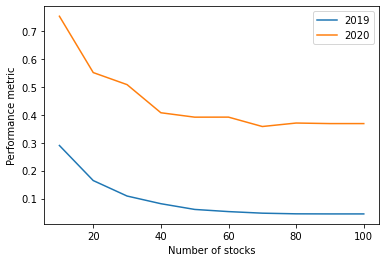

In [73]:
max_m = 100
min_m = 10
step = 10

performance_2019 = []
performance_2020 = []

for m in range(min_m, max_m + step, step):
    # weights + ON variables + returns
    obj = np.array([0] * n + [0] * n + [1] * len(returns))

    vtype = ['C'] * n + ['B'] * n + ['C'] * len(returns)

    eq = 1 + 1 + n + (len(returns) * 2)
    var = n + n + len(returns)
    A = np.zeros((eq, var))                     
    b = np.zeros(eq)
    sense = np.array(['<'] * eq )

    # sum of weights is 1
    A[0,:n] = 1
    b[0] = 1
    sense[0] = '='

    # Total number of stocks < m
    A[1, n : 2*n] = 1
    b[1] = m
    sense[1] = '='

    # wi > 0 iff yi > 0 ==> wi < yi ==> wi - yi < 0
    for i in range(n):
        A[2 + i, i] = 1
        A[2 + i, i + n] = -1

    # follow the index
    for i in range(len(returns)):
        for j in range(n):
            A[2*i + 1 + n + 1, j] = returns.iloc[i, j+1]
            A[2*i + 2 + n + 1, j] = returns.iloc[i, j+1]
        A[2*i + 1 + n + 1, n + n + i] = 1
        A[2*i + 2 + n + 1, n + n + i] = -1
        b[2*i + 1 + n + 1] = returns['NDX'].iloc[i]
        b[2*i + 2 + n + 1] = returns['NDX'].iloc[i]
        sense[2*i + 1 + n + 1] = '>'
        sense[2*i + 2 + n + 1] = '<'

    opModel = gp.Model()

    opModX = opModel.addMVar(len(obj), vtype = vtype)

    opModCon = opModel.addMConstrs(A, opModX, sense, b)
    opModel.setMObjective(None, obj, 0, sense=gp.GRB.MINIMIZE)

    opModel.Params.OutputFlag = 0
    opModel.Params.TimeLimit = 3600
    opModel.optimize()  

    weights = opModX.x[:n]

    returns['portfolio'] = 0

    for i in range(n):
        returns['portfolio'] = returns['portfolio'] + weights[i] * returns.iloc[:, i+1]

    returns['portfolio_performance'] = returns['NDX'] - returns['portfolio']
    returns['portfolio_performance'] = returns['portfolio_performance'].abs()
    #print("\nPerformance on 2019 stocks - ", returns['portfolio_performance'].sum())
    performance_2019 = performance_2019 + [returns['portfolio_performance'].sum()]

    returns_20['portfolio'] = 0

    for i in range(n):
        returns_20['portfolio'] = returns_20['portfolio'] + weights[i] * returns_20.iloc[:, i+1]

    returns_20['portfolio_performance'] = returns_20['NDX'] - returns_20['portfolio']
    returns_20['portfolio_performance'] = returns_20['portfolio_performance'].abs()
    #print("Performance on 2020 stocks - ", returns_20['portfolio_performance'].sum())
    performance_2020 = performance_2020 + [returns_20['portfolio_performance'].sum()]

    
pd.DataFrame({
    'number of stocks' : range(min_m, max_m + step, step),
    '2019' : performance_2019,
    '2020' : performance_2020
}).to_csv('result.csv', index=False)    
plt.plot(range(min_m, max_m + step, step), performance_2019, label = '2019')
plt.plot(range(min_m, max_m + step, step), performance_2020, label = '2020')
plt.legend()
plt.xlabel('Number of stocks')
plt.ylabel('Performance metric')
plt.show()